## Linear Regression on a graph

w[0]: 0.393906  b: -0.031804


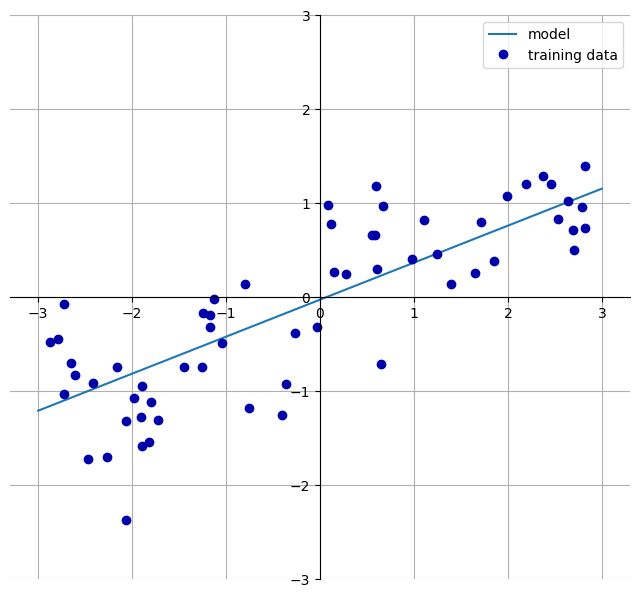

In [52]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [53]:
import mglearn.datasets
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [55]:
lr = LinearRegression().fit(x_train,y_train)

In [56]:
print(f'Weight is= {lr.coef_}')
print(f'Bias is= {lr.intercept_}')

Weight is= [0.39390555]
Bias is= -0.031804343026759746


In [57]:
print(lr.score(x_train,y_train))

0.6700890315075756


In [58]:
print(lr.score(x_test,y_test))

0.65933685968637


## Multiple Regression

In [59]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [60]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [61]:
X,y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [62]:
x_train,x_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [63]:
lr = LinearRegression().fit(x_train,y_train)
print(f'Train Accuracy {lr.score(x_train,y_train)}')
print(f'Test Accuracy {lr.score(x_test,y_test)}')

Train Accuracy 0.9520519609032728
Test Accuracy 0.6074721959665773


Modelde görüldüğü gibi overfitting vardır. train ve test arası tutarsızlık bunu gösteriyor.

In [64]:
import pandas as pd

data = pd.read_csv('/home/cemal/PyToHn/LinearRegression/student/student-mat.csv',sep=";")
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [65]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [66]:
data = data[['G1','G2','G3','studytime','failures','absences','age']]
data.head()

,G1,G2,G3,studytime,failures,absences,age
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


In [67]:
data.dtypes

G1           int64
G2           int64
G3           int64
studytime    int64
failures     int64
absences     int64
age          int64
dtype: object

In [68]:
import numpy as np
y = np.array(data['G3'])
X = np.array(data.drop('G3',axis=1))

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [71]:
linear.fit(x_train,y_train)

LinearRegression()

In [72]:
print(f'Train Accuracy {linear.score(x_train,y_train)}')
print(f'Test Accuracy {linear.score(x_test,y_test)}')

Train Accuracy 0.8401462447425909
Test Accuracy 0.782391753439966


In [73]:
print(f'Weights {linear.coef_}')
print(f'Bias {linear.intercept_}')

Weights [ 0.16272896  0.96403864 -0.05659647 -0.38258344  0.04319683 -0.17538414]
Bias 1.2036120136340074


Mean Squared Error: 4.462067381634459
Root Mean Squared Error: 2.112360618273892
R-squared: 0.782391753439966


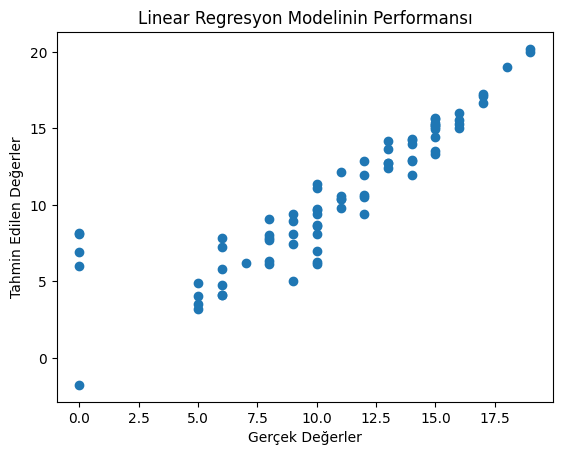

In [74]:
new_data = np.array([[15,14,3,0,2,15]])
linear.predict(new_data)
y_pred = linear.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

import matplotlib.pyplot as plt
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Linear Regresyon Modelinin Performansı")
plt.show()

## Rigde ve Lasso (Regulation)

In [75]:
# Ridge = The coefs (weight and bias) shouldbe as close to zero or even zero as possible.
# The aim is to reduce the ınfluence of the coefs on the models

from mglearn.datasets import load_extended_boston
X,y = load_extended_boston()
X.shape

(506, 104)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [77]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train,y_train)
print(f'Ridge train accuracy {ridge.score(x_train,y_train)}')
print(f'Ridge test accuracy {ridge.score(x_test,y_test)}')

Ridge train accuracy 0.870096977525992
Ridge test accuracy 0.8145421818415552


 Alpha değeri arttıkça katsayılar sıfıra daha yakın olacaktır. Bu performansı azaltır ama genellemeyi arttırır.

In [78]:
ridge10 = Ridge(alpha=10).fit(x_train,y_train)

In [79]:
print(ridge10.score(x_train,y_train))

0.7669532344928074


In [80]:
print(ridge10.score(x_test,y_test))

0.7279392273706593


In [81]:
ridge01 = Ridge(alpha=0.1).fit(x_train,y_train)
print(f'Ridge train accuracy {ridge01.score(x_train,y_train)}')
print(f'Ridge test accuracy {ridge01.score(x_test,y_test)}')

Ridge train accuracy 0.9174870139232214
Ridge test accuracy 0.8246491875314635


Doğruluk oranları arttı çünkü alpha değeri düştü ve katsayılar daha az cezalandırıldı. Buda daha çok linear regression modeline yaklaştı. 

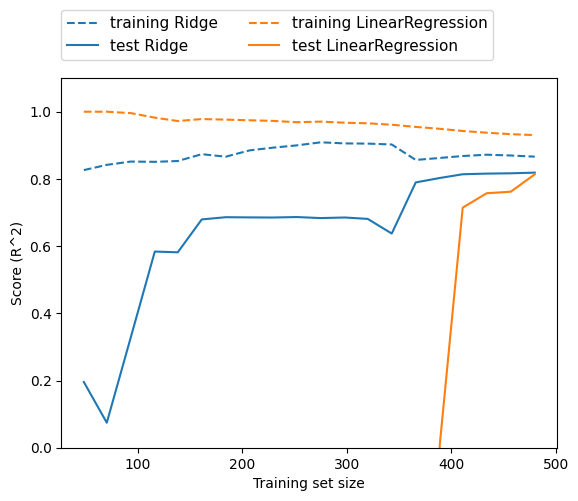

In [82]:
import mglearn
mglearn.plots.plot_ridge_n_samples()

In [83]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(x_train,y_train)
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.26783778369518485
0.2599232118344591


Score değerleri oldukça kötü. bunun anlamı modelde underfitting var.

In [84]:
import numpy as np
np.sum(lasso.coef_ != 0)

np.int64(3)

In [85]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(x_train,y_train)
print(lasso001.score(x_train,y_train))
print(lasso001.score(x_test,y_test))

0.8864717420585477
0.8036004116583616


Score Değerleri çok arttı. sebebi alpha değerini azalttık ve daha complex bir model hazırladık. Alpha değerleri lasso ve ridge içersinde katsayıları ne kadar cezalandırma gücünü temsil eder.

In [87]:
#ElasticNet = Lasso + Ridge
